In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import grid

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X = data.data
y = data.target

In [10]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.958041958041958

In [19]:
print(classification_report(y_test,y_pred,target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [22]:
# Feature importance
importance = pd.Series(
    clf.feature_importances_,
    index=data.feature_names,
).sort_values(ascending=False).head()
importance

worst area              0.149674
worst concave points    0.127189
mean concave points     0.104650
worst radius            0.086963
worst perimeter         0.080299
dtype: float64

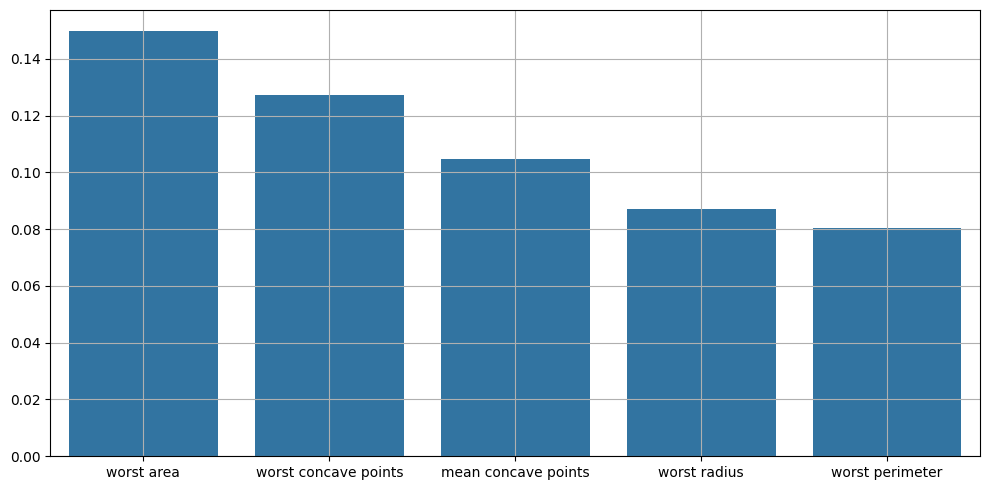

In [26]:
# visualization
plt.figure(figsize=(10,5))
sns.barplot(data=importance)
plt.tight_layout()
plt.grid()
plt.show()

In [28]:
# Grid search
param_dist = {
    'n_estimators':[100,150,175,200],
    'max_depth':[None,5,10,15,20]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_dist,n_jobs=1,cv=5)

In [29]:
grid.fit(X_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [36]:
print(grid.best_score_)
print(classification_report(y_test,y_pred,target_names=data.target_names))

0.9600547195622434
              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

